# Price prediction

## Modules

In [232]:
import pandas as pd
import numpy as np

## Data preparation

In [233]:
data = pd.read_csv('data.csv')
data.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [234]:
data.columns = data.columns.str.lower().str.replace(' ','_')
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [235]:
data.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [236]:
string_columns = list(data.select_dtypes('object').columns)

In [237]:
data[string_columns] = data[string_columns].apply(lambda x:x.str.lower().str.replace(' ', '_'))
data[string_columns].head()

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
0,bmw,1_series_m,premium_unleaded_(required),manual,rear_wheel_drive,"factory_tuner,luxury,high-performance",compact,coupe
1,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,performance",compact,convertible
2,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,high-performance",compact,coupe
3,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,performance",compact,coupe
4,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,luxury,compact,convertible


## Exploratory Data Analysis

In [238]:
for column in data[string_columns]:
    print(column)
    print(data[column].unique()[:5])
    print(data[column].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16



In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='msrp', ylabel='Count'>

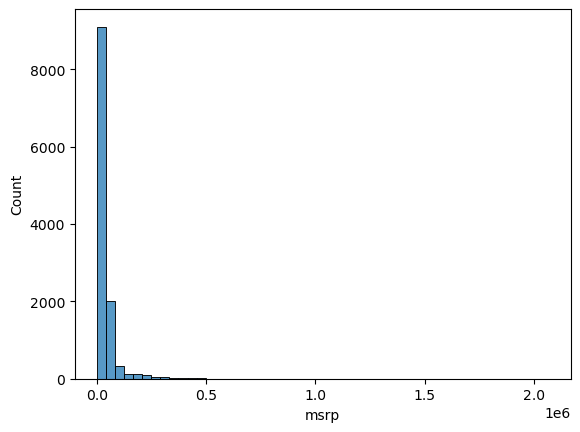

In [240]:
sns.histplot(data.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

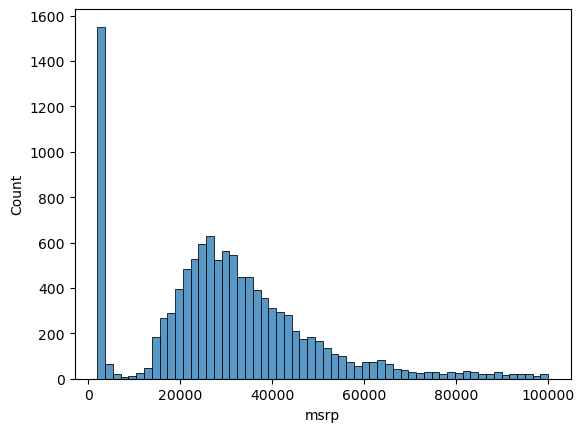

In [241]:
sns.histplot(data[data.msrp<1e5].msrp)

<Axes: xlabel='msrp', ylabel='Count'>

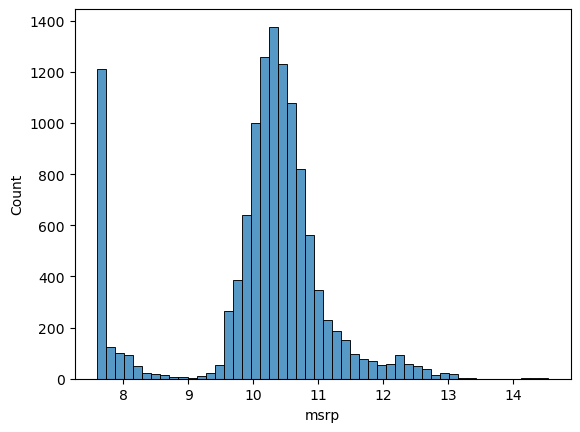

In [242]:
price_logs = np.log(data.msrp)
sns.histplot(price_logs, bins=50)

Missing values

In [243]:
data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting up the validation framework

In [244]:
n = len(data)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = int(n - n_val - n_test)

In [245]:
n, n_val + n_test + n_train

(11914, 11914)

In [246]:
idx = np.arange(n)
np.random.seed(10)
np.random.shuffle(idx)

In [247]:
data_train = data.iloc[idx[:n_train]].reset_index(drop=True)
data_test = data.iloc[idx[n_train: n_train + n_val]].reset_index(drop=True)
data_val = data.iloc[idx[n_train + n_val:]].reset_index(drop=True)

In [248]:
len(data_val.index), len(data_test.index), len(data_train.index)

(2382, 2382, 7150)

In [249]:
data_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,volvo,v70,2008,premium_unleaded_(recommended),235.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,24,16,870,32465
1,hyundai,genesis_coupe,2014,premium_unleaded_(recommended),274.0,4.0,manual,rear_wheel_drive,2.0,performance,midsize,coupe,27,19,1439,27200
2,ferrari,575m,2004,premium_unleaded_(required),515.0,12.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,15,9,2774,217890
3,ford,fiesta,2015,regular_unleaded,120.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,36,28,5657,14455
4,suzuki,reno,2007,regular_unleaded,127.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,28,20,481,13599


In [250]:
y_train = np.log1p(data_train.msrp.values)
y_val = np.log1p(data_val.msrp.values)
y_test = np.log1p(data_test.msrp.values)

In [251]:
data_train.drop('msrp', axis=1, inplace=True)
data_val.drop('msrp', axis=1, inplace=True)
data_test.drop('msrp', axis=1, inplace=True)

In [252]:
len(y_train)

7150

## Linear Regression

In [253]:
xi = [453, 11, 86]
w  = [0.01, 0.04, 0.002]
w0 = 7.17

def linear_regression(xi):
    n = len(xi)
    pred = w0
    for i in range(n):
        pred+=w[i]*xi[i]
    return pred

In [254]:
linear_regression(xi)

12.312

## Linear Regression Vector form

In [255]:
xi = [453, 11, 86]
w  = [0.01, 0.04, 0.002]
w0 = 7.17

def dot(xi):
    n = len(xi)
    return sum([w[i]*xi[i] for i in range(n)])

def linear_regression(xi):
    return w0 + dot(xi)

In [256]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [257]:
def dot(xi, w):
    n = len(xi)
    return sum([w[i]*xi[i] for i in range(n)])

def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [258]:
linear_regression(xi)

12.312

In [259]:
x1 = [1, 453, 11, 86]
x2 = [1, 440, 10, 80]
x3 = [1, 461, 15, 91]

X = np.array([x1, x2, x3])

def linear_regression(X):
    return np.dot(X, w_new)

## Training a Linear Regression model 

In [260]:
X = [
        [453, 11, 86],
        [440, 10, 80],
        [461, 15, 91],
        [413, 12, 186],
        [410, 23, 12],
        [361, 9, 88]
]
X = np.array(X)

In [261]:
ones = np.ones(X.shape[0])
X = np.column_stack([ones, X])

In [262]:
XTX = X.T@X
inv_XTX = np.linalg.inv(XTX)

print(inv_XTX.shape)

np.matmul(inv_XTX, XTX).round(1)

(4, 4)


array([[ 1.,  0.,  0.,  0.],
       [-0.,  1., -0., -0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [263]:
y = [1, 2, 3, 4, 5, 6]

w_full = inv_XTX@X.T@y
w_full

array([ 2.05169996e+01, -4.65128220e-02,  1.63122591e-01,  5.33653353e-03])

In [264]:
w0, *w = w_full
print(w0, w)

20.516999561456164 [-0.04651282203439429, 0.16312259059430206, 0.005336533530408277]


In [265]:
X = [
        [453, 11, 86],
        [440, 10, 80],
        [461, 15, 91],
        [413, 12, 186],
        [410, 23, 12],
        [361, 9, 88]
]
X = np.array(X)

def train_linear_regression(X: np.ndarray, y):
    X_copy = X.copy()
    ones = np.ones(X_copy.shape[0])
    X_copy = np.column_stack([ones, X_copy])
    XTX = X_copy.T@X_copy
    inv_XTX = np.linalg.inv(XTX)
    w_full = inv_XTX@X_copy.T@y
    w0, *w = w_full
    return w0, w

train_linear_regression(X, y)

(20.516999561456164,
 [-0.04651282203439429, 0.16312259059430206, 0.005336533530408277])

## Car price baseline model

In [266]:
data_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,volvo,v70,2008,premium_unleaded_(recommended),235.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,24,16,870
1,hyundai,genesis_coupe,2014,premium_unleaded_(recommended),274.0,4.0,manual,rear_wheel_drive,2.0,performance,midsize,coupe,27,19,1439
2,ferrari,575m,2004,premium_unleaded_(required),515.0,12.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,15,9,2774
3,ford,fiesta,2015,regular_unleaded,120.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,36,28,5657
4,suzuki,reno,2007,regular_unleaded,127.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,28,20,481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,fiat,500,2016,premium_unleaded_(recommended),101.0,4.0,manual,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,40,31,819
7146,chevrolet,s-10,2002,regular_unleaded,190.0,6.0,automatic,four_wheel_drive,3.0,NaN,compact,extended_cab_pickup,18,14,1385
7147,volkswagen,golf_sportwagen,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,35,25,873
7148,aston_martin,v8_vantage,2016,premium_unleaded_(required),430.0,8.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,19,13,259


In [267]:
data_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [268]:
FEATURE_NAMES = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
data_train[FEATURE_NAMES]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,235.0,6.0,24,16,870
1,274.0,4.0,27,19,1439
2,515.0,12.0,15,9,2774
3,120.0,4.0,36,28,5657
4,127.0,4.0,28,20,481
...,...,...,...,...,...
7145,101.0,4.0,40,31,819
7146,190.0,6.0,18,14,1385
7147,170.0,4.0,35,25,873
7148,430.0,8.0,19,13,259


In [269]:
X_train = data_train[FEATURE_NAMES].values

In [270]:
data_train[FEATURE_NAMES].isna().sum()

engine_hp           39
engine_cylinders    23
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [271]:
data_train[FEATURE_NAMES].fillna(0).isna().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [272]:
X_train = data_train[FEATURE_NAMES].fillna(0).values

In [273]:
w0, w = train_linear_regression(X_train, y_train)

In [274]:
y_pred_train = X_train@w + w0
print(y_pred_train)
print(y_pred_train.shape)
print(X_train.shape)

[ 9.86984661 10.57812054 11.3749309  ...  9.91177509 11.2361509
  9.53036259]
(7150,)
(7150, 5)


<Axes: ylabel='Count'>

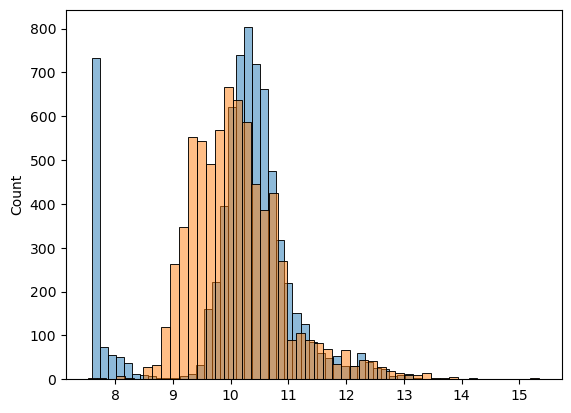

In [275]:
sns.histplot(y_train, alpha=.5, bins=50)
sns.histplot(y_pred_train, alpha=.5, bins=50)

## RMSE

In [276]:
def rmse(y_pred: np.array, y_true: np.array):
    se: np.array = (y_pred - y_true)**2
    return np.sqrt(se.mean())

In [277]:
rmse(y_pred_train, y_train)

0.7504760397364794

## Validating the model

In [278]:
FEATURE_NAMES = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
w0, w = train_linear_regression(X_train, y_train)
y_pred_train = X_train@w + w0

In [279]:
def prepare_X(df):
    X_train = df[FEATURE_NAMES].values
    X_train = df[FEATURE_NAMES].fillna(0).values
    return X_train

In [280]:
X_train = prepare_X(data_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(data_val)
y_pred_val = X_val.dot(w) + w0
rmse(y_pred_val, y_val)

0.7280454051099923

In [281]:
data_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

## Simple feature engineering

In [282]:
data_train.year.max()

2017

In [283]:
def prepare_X(df):
    df_copy = df.copy()
    df_copy['age'] = 2017 - df_copy.year
    features = FEATURE_NAMES + ['age']
    X = df_copy[features].values
    X = df_copy[features].fillna(0).values
    return X

In [284]:
X_train = prepare_X(data_train)
X_train

array([[2.350e+02, 6.000e+00, 2.400e+01, 1.600e+01, 8.700e+02, 9.000e+00],
       [2.740e+02, 4.000e+00, 2.700e+01, 1.900e+01, 1.439e+03, 3.000e+00],
       [5.150e+02, 1.200e+01, 1.500e+01, 9.000e+00, 2.774e+03, 1.300e+01],
       ...,
       [1.700e+02, 4.000e+00, 3.500e+01, 2.500e+01, 8.730e+02, 1.000e+00],
       [4.300e+02, 8.000e+00, 1.900e+01, 1.300e+01, 2.590e+02, 1.000e+00],
       [1.380e+02, 4.000e+00, 3.300e+01, 2.500e+01, 1.550e+02, 2.000e+00]])

In [285]:
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(data_val)
y_pred_val = X_val.dot(w) + w0
rmse(y_pred_val, y_val)

0.5196140941472887

<Axes: ylabel='Count'>

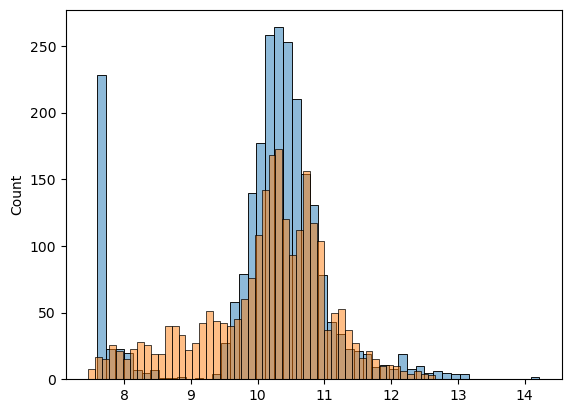

In [286]:
sns.histplot(y_val, alpha=.5, bins=50)
sns.histplot(y_pred_val, alpha=.5, bins=50)

## Categorical variables

In [287]:
data_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [288]:
data_train.number_of_doors.value_counts()
pd.get_dummies(data_train, columns=['number_of_doors'])

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,number_of_doors_2.0,number_of_doors_3.0,number_of_doors_4.0
0,volvo,v70,2008,premium_unleaded_(recommended),235.0,6.0,automatic,front_wheel_drive,luxury,midsize,wagon,24,16,870,False,False,True
1,hyundai,genesis_coupe,2014,premium_unleaded_(recommended),274.0,4.0,manual,rear_wheel_drive,performance,midsize,coupe,27,19,1439,True,False,False
2,ferrari,575m,2004,premium_unleaded_(required),515.0,12.0,manual,rear_wheel_drive,"exotic,high-performance",compact,coupe,15,9,2774,True,False,False
3,ford,fiesta,2015,regular_unleaded,120.0,4.0,manual,front_wheel_drive,NaN,compact,sedan,36,28,5657,False,False,True
4,suzuki,reno,2007,regular_unleaded,127.0,4.0,manual,front_wheel_drive,hatchback,compact,4dr_hatchback,28,20,481,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,fiat,500,2016,premium_unleaded_(recommended),101.0,4.0,manual,front_wheel_drive,hatchback,compact,2dr_hatchback,40,31,819,True,False,False
7146,chevrolet,s-10,2002,regular_unleaded,190.0,6.0,automatic,four_wheel_drive,NaN,compact,extended_cab_pickup,18,14,1385,False,True,False
7147,volkswagen,golf_sportwagen,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,NaN,compact,wagon,35,25,873,False,False,True
7148,aston_martin,v8_vantage,2016,premium_unleaded_(required),430.0,8.0,manual,rear_wheel_drive,"exotic,high-performance",compact,coupe,19,13,259,True,False,False


In [289]:
pd.get_dummies(data_train[['number_of_doors','make']].astype('category'), dtype=int).dtypes

number_of_doors_2.0    int32
number_of_doors_3.0    int32
number_of_doors_4.0    int32
make_acura             int32
make_alfa_romeo        int32
make_aston_martin      int32
make_audi              int32
make_bentley           int32
make_bmw               int32
make_bugatti           int32
make_buick             int32
make_cadillac          int32
make_chevrolet         int32
make_chrysler          int32
make_dodge             int32
make_ferrari           int32
make_fiat              int32
make_ford              int32
make_genesis           int32
make_gmc               int32
make_honda             int32
make_hummer            int32
make_hyundai           int32
make_infiniti          int32
make_kia               int32
make_lamborghini       int32
make_land_rover        int32
make_lexus             int32
make_lincoln           int32
make_lotus             int32
make_maserati          int32
make_maybach           int32
make_mazda             int32
make_mclaren           int32
make_mercedes-

In [290]:
makes = list(data_train.make.value_counts().head().index)
number_of_doors = list(data_train.number_of_doors.value_counts().index)
print(makes, number_of_doors)

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'] [4.0, 2.0, 3.0]


In [291]:
CATEGORICAL_FEATURES = ['number_of_doors',
                        'make',
                        'engine_fuel_type',
                        'transmission_type',
                        'driven_wheels',
                        'market_category',
                        'vehicle_size',
                        'vehicle_style'
]

categories={}
for i in CATEGORICAL_FEATURES:
    categories[i] = list(data_train[i].value_counts().head().index)
categories

{'number_of_doors': [4.0, 2.0, 3.0],
 'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'luxury',
  'flex_fuel',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [292]:
CATEGORICAL_FEATURES = {'number_of_doors': [4.0, 2.0, 3.0],
 'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'luxury',
  'flex_fuel',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

def prepare_X(df):
    df_copy = df.copy()
    df_copy['age'] = 2017 - df_copy.year

    features = FEATURE_NAMES + ['age']
    for column, cats in CATEGORICAL_FEATURES.items():
        for cat in cats:
            df_copy[f'{column}_{cat}'] = (df_copy[column]==cat)*1
            features.append(f'{column}_{cat}')

    X = df_copy[features].values
    X = df_copy[features].fillna(0).values
    return X

In [293]:
X_train = prepare_X(data_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(data_val)
y_pred_val = X_val.dot(w) + w0
rmse(y_val, y_pred_val)

319.02224841326887

In [294]:
print(w0, w)

-4.297447892333402e+16 [0.5770442033011478, -66.53754227909901, -17.528751261099696, 10.77106738278032, -0.0023887798187341583, 1.0520877416423497, -11212.713778316662, -11184.378744198875, -11217.353451718052, 12.572503056254247, 1.76114462256272, -20.03184932093413, -5.859478566407015, 22.17943877217714, 287.582228647716, 272.891647690737, 269.4598049023614, 308.6900220752011, 306.907692002462, 4.264020888574059e+16, 4.264020888574055e+16, 4.264020888574067e+16, 4.264020888574006e+16, 4.264020888573882e+16, 334270037604945.94, 334270037604900.1, 334270037604907.06, 334270037604910.2, -26.777909788959207, -7.989695893932357, -5.831459461056546, 1.7273042230899582, 3.7225583255485244, -59.60295497990557, -75.49153136434931, -88.76386915607455, 0.046442120630942885, 0.04314609903787758, 0.24576459646452933, 0.354767409904999, -0.13269001628077737]


## Regularization

In [295]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001]
]
y = [1, 2, 3, 1, 2, 3]

X = np.array(X)
XTX = X.T.dot(X)
print(XTX)


[[140.        111.        111.0000004]
 [111.        108.        108.0000005]
 [111.0000004 108.0000005 108.000001 ]]


In [296]:
inv_XTX = np.linalg.inv(XTX)
inv_XTX

array([[ 4.07252125e-02, -4.86981331e+05,  4.86981308e+05],
       [-4.86981357e+05,  1.10817945e+14, -1.10817944e+14],
       [ 4.86981313e+05, -1.10817944e+14,  1.10817943e+14]])

In [297]:
inv_XTX.dot(X.T).dot(y)

array([ 1.40505451e+00, -1.38928259e+07,  1.38928251e+07])

In [298]:
XTX = XTX+np.eye(3)*1e-3

In [299]:
np.linalg.inv(XTX)

array([[ 3.85829338e-02, -1.98294462e-02, -1.98250521e-02],
       [-1.98294462e-02,  5.00012508e+02, -4.99987496e+02],
       [-1.98250521e-02, -4.99987496e+02,  5.00012499e+02]])

In [300]:
def train_linear_regression_reg(X: np.ndarray, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T@X
    XTX = XTX + np.eye(XTX.shape[0])*r
    inv_XTX = np.linalg.inv(XTX)
    w_full = inv_XTX@X.T@y
    w0, *w = w_full
    return w0, w

In [301]:
X_train = prepare_X(data_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.00001)

X_val = prepare_X(data_val)
y_pred_val = X_val.dot(w) + w0
rmse(y_val, y_pred_val)

0.4583091865708375

## Tuning the model

In [302]:
for r in [10, 0.5, 0.15, 0.1, 0.01, 0.001, 0.001, 0.0001]:
    X_train = prepare_X(data_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(data_val)
    y_pred_val = X_val.dot(w) + w0
    score = rmse(y_val, y_pred_val)
    print(f'{r=}, {score=}, {w0=}')

r=10, score=0.4738891838567524, w0=4.250646638976439
r=0.5, score=0.4585141050006475, w0=6.185632146627691
r=0.15, score=0.4582397407799434, w0=6.572637331124853
r=0.1, score=0.45824102743414175, w0=6.645030645875558
r=0.01, score=0.4582973871265775, w0=6.791230931639127
r=0.001, score=0.4583079611709647, w0=6.8067635957693335
r=0.001, score=0.4583079611709647, w0=6.8067635957693335
r=0.0001, score=0.4583090762976943, w0=6.777070455983266


In [303]:
r = 0.15
X_train = prepare_X(data_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(data_val)
y_pred_val = X_val.dot(w) + w0
score = rmse(y_val, y_pred_val)

## Using the model

In [304]:
data_full_train = pd.concat([data_train, data_val]).reset_index(drop=True)
data_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,volvo,v70,2008,premium_unleaded_(recommended),235.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,24,16,870
1,hyundai,genesis_coupe,2014,premium_unleaded_(recommended),274.0,4.0,manual,rear_wheel_drive,2.0,performance,midsize,coupe,27,19,1439
2,ferrari,575m,2004,premium_unleaded_(required),515.0,12.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,15,9,2774
3,ford,fiesta,2015,regular_unleaded,120.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,36,28,5657
4,suzuki,reno,2007,regular_unleaded,127.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,28,20,481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,nissan,nx,1993,regular_unleaded,140.0,4.0,manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,28,20,2009
9528,volvo,xc90,2016,premium_unleaded_(recommended),250.0,4.0,automatic,all_wheel_drive,4.0,"crossover,luxury",large,4dr_suv,25,22,870
9529,oldsmobile,alero,2002,regular_unleaded,170.0,6.0,automatic,front_wheel_drive,2.0,NaN,midsize,coupe,27,18,26
9530,honda,odyssey,2015,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202


In [305]:
X_full_train = prepare_X(data_full_train)
X_full_train

array([[235.,   6.,  24., ...,   0.,   0.,   0.],
       [274.,   4.,  27., ...,   1.,   0.,   0.],
       [515.,  12.,  15., ...,   1.,   0.,   0.],
       ...,
       [170.,   6.,  27., ...,   1.,   0.,   0.],
       [248.,   6.,  28., ...,   0.,   0.,   0.],
       [150.,   4.,  29., ...,   1.,   0.,   0.]])

In [306]:
y_full_train = np.concatenate((y_train, y_val))

In [307]:
r = 0.15
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=r)

X_test = prepare_X(data_test)
y_pred_test = X_test.dot(w) + w0
score_test = rmse(y_test, y_pred_test)

In [308]:
print(score_test)

0.51814486176691


## Using the model

In [316]:
car = data_test.iloc[10].to_dict()
car_df = pd.DataFrame(car, index=[0])

In [322]:
X = prepare_X(car_df)
y_pred = X@w + w0
y_pred = y_pred[0]

In [323]:
np.expm1(y_pred)

32469.879013476704

In [328]:
np.expm1(y_test[10])

41699.99999999998